In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
import os
import cv2
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from tensorflow.keras.applications.vgg16 import VGG16, preprocess_input
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Dense, Flatten, Dropout
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.utils import to_categorical


In [ ]:
import zipfile
import os

zip_path = "/content/drive/MyDrive/archive (1).zip"  # replace with your file path
extract_to = "extracted_files"  # replace or customize

# Create the output directory if it doesn't exist
os.makedirs(extract_to, exist_ok=True)

# Unzip the file
with zipfile.ZipFile(zip_path, 'r') as zip_ref:
    zip_ref.extractall(extract_to)

print("Unzipped successfully!")


Unzipped successfully!


In [ ]:
import zipfile

with zipfile.ZipFile("/content/drive/MyDrive/archive (1).zip", 'r') as zip_ref:
    zip_ref.extractall("animals_dataset")


In [ ]:
import os

base_path = "animals_dataset"
print(os.listdir(base_path))


['translate.py', 'raw-img']


In [ ]:
data_dir = os.path.join(base_path, "raw-img")
print(os.listdir(data_dir))  # This should print the 10 class folders


['scoiattolo', 'gatto', 'mucca', 'cavallo', 'pecora', 'cane', 'farfalla', 'gallina', 'elefante', 'ragno']


In [ ]:
classes = os.listdir(data_dir)
label_dict = {cls: i for i, cls in enumerate(classes)}

data = []
labels = []

for cls in classes:
    path = os.path.join(data_dir, cls)
    for img_name in os.listdir(path):
        try:
            img_path = os.path.join(path, img_name)
            img = cv2.imread(img_path)
            img = cv2.resize(img, (224, 224))  # ResNet/VGG input size
            data.append(img)
            labels.append(label_dict[cls])
        except:
            continue


In [ ]:
from tensorflow.keras.applications.vgg16 import VGG16
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Flatten, Dense, Dropout

# Load the VGG16 model without the top classification layer
base_model = VGG16(weights='imagenet', include_top=False, input_shape=(224, 224, 3))

# Freeze all layers in the base model
for layer in base_model.layers:
    layer.trainable = False

# Add custom layers
x = Flatten()(base_model.output)
x = Dense(128, activation='relu')(x)
x = Dropout(0.3)(x)
output = Dense(len(classes), activation='softmax')(x)

# Final model
model = Model(inputs=base_model.input, outputs=output)

# Compile the model
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

# View the model summary
model.summary()

Model: "functional"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ input_layer_1 (InputLayer)      │ (None, 224, 224, 3)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block1_conv1 (Conv2D)           │ (None, 224, 224, 64)   │         1,792 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block1_conv2 (Conv2D)           │ (None, 224, 224, 64)   │        36,928 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block1_pool (MaxPooling2D)      │ (None, 112, 112, 64)   │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block2_conv1 (Conv2D)           │ (None, 112, 112, 128)  │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block2_conv2 (Conv2D)           │ (None, 112, 112, 128)  │       147,584 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block2_pool (MaxPooling2D)      │ (None, 56, 56, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block3_conv1 (Conv2D)           │ (None, 56, 56, 256)    │       295,168 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block3_conv2 (Conv2D)           │ (None, 56, 56, 256)    │       590,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block3_conv3 (Conv2D)           │ (None, 56, 56, 256)    │       590,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block3_pool (MaxPooling2D)      │ (None, 28, 28, 256)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block4_conv1 (Conv2D)           │ (None, 28, 28, 512)    │     1,180,160 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block4_conv2 (Conv2D)           │ (None, 28, 28, 512)    │     2,359,808 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block4_conv3 (Conv2D)           │ (None, 28, 28, 512)    │     2,359,808 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block4_pool (MaxPooling2D)      │ (None, 14, 14, 512)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block5_conv1 (Conv2D)           │ (None, 14, 14, 512)    │     2,359,808 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block5_conv2 (Conv2D)           │ (None, 14, 14, 512)    │     2,359,808 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block5_conv3 (Conv2D)           │ (None, 14, 14, 512)    │     2,359,808 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block5_pool (MaxPooling2D)      │ (None, 7, 7, 512)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_1 (Flatten)             │ (None, 25088)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 128)            │     3,211,392 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_1 (Dropout)             │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 10)             │         1,290 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 17,927,370 (68.39 MB)

 Trainable params: 3,212,682 (12.26 MB)

 Non-trainable params: 14,714,688 (56.13 MB)

In [ ]:
#large datset so we are use imagedata generator
from tensorflow.keras.preprocessing.image import ImageDataGenerator

train_datagen = ImageDataGenerator(
    rescale=1./255,
    validation_split=0.2,  # 20% for validation
    rotation_range=20,
    zoom_range=0.2,
    horizontal_flip=True
)


train_generator = train_datagen.flow_from_directory(
    directory="animals_dataset/raw-img",
    target_size=(224, 224),
    batch_size=32,
    class_mode='categorical',
    subset='training',
    shuffle=True
)

val_generator = train_datagen.flow_from_directory(
    directory="animals_dataset/raw-img",
    target_size=(224, 224),
    batch_size=32,
    class_mode='categorical',
    subset='validation',
    shuffle=True
)

num_classes = train_generator.num_classes


Found 20947 images belonging to 10 classes.
Found 5232 images belonging to 10 classes.


In [ ]:
#updated vgg16 transfer learning model based on image generation
from tensorflow.keras.applications import VGG16
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Flatten, Dense, Dropout

base_model = VGG16(weights='imagenet', include_top=False, input_shape=(224, 224, 3))
for layer in base_model.layers:
    layer.trainable = False

x = Flatten()(base_model.output)
x = Dense(128, activation='relu')(x)
x = Dropout(0.3)(x)
output = Dense(num_classes, activation='softmax')(x)

model = Model(inputs=base_model.input, outputs=output)

model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])


58889256/58889256 ━━━━━━━━━━━━━━━━━━━━ 4s 0us/step


In [ ]:
history = model.fit(
    train_generator,
    validation_data=val_generator,


    epochs=5

)


/usr/local/lib/python3.11/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


Epoch 1/5
655/655 ━━━━━━━━━━━━━━━━━━━━ 420s 622ms/step - accuracy: 0.4738 - loss: 1.6370 - val_accuracy: 0.7538 - val_loss: 0.7761
Epoch 2/5
655/655 ━━━━━━━━━━━━━━━━━━━━ 391s 598ms/step - accuracy: 0.6309 - loss: 1.0464 - val_accuracy: 0.7638 - val_loss: 0.7236
Epoch 3/5
655/655 ━━━━━━━━━━━━━━━━━━━━ 391s 597ms/step - accuracy: 0.6570 - loss: 0.9614 - val_accuracy: 0.7796 - val_loss: 0.6758
Epoch 4/5
655/655 ━━━━━━━━━━━━━━━━━━━━ 396s 605ms/step - accuracy: 0.6788 - loss: 0.9015 - val_accuracy: 0.7752 - val_loss: 0.6926
Epoch 5/5
655/655 ━━━━━━━━━━━━━━━━━━━━ 389s 593ms/step - accuracy: 0.6831 - loss: 0.8817 - val_accuracy: 0.8180 - val_loss: 0.5771


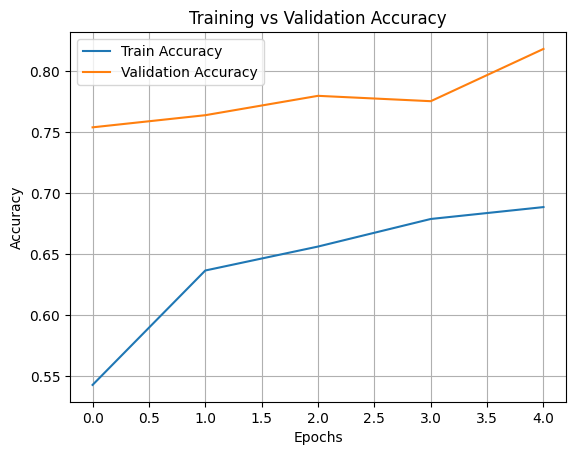

In [ ]:
import matplotlib.pyplot as plt

# Accuracy plot
plt.plot(history.history['accuracy'], label='Train Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.legend()
plt.title('Training vs Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.grid(True)
plt.show()


In [ ]:
loss, accuracy = model.evaluate(val_generator)
print(f"Validation Loss: {loss:.4f}")
print(f"Validation Accuracy: {accuracy * 100:.2f}%")


164/164 ━━━━━━━━━━━━━━━━━━━━ 76s 461ms/step - accuracy: 0.8247 - loss: 0.5728
Validation Loss: 0.5805
Validation Accuracy: 81.75%


In [ ]:
import os

# List of all class names
classes = ['cane', 'cavallo', 'elefante', 'farfalla', 'gallina',
           'gatto', 'mucca', 'pecora', 'ragno', 'scoiattolo']

base_dir = "animals_dataset/raw-img"

# Dictionary to store all file paths for each class
all_file_paths = {}

for class_name in classes:
    class_path = os.path.join(base_dir, class_name)
    if os.path.isdir(class_path):
        files = os.listdir(class_path)
        full_paths = [os.path.join(class_path, f) for f in files if os.path.isfile(os.path.join(class_path, f))]
        all_file_paths[class_name] = full_paths
        print(f"{class_name}: {len(full_paths)} files")
    else:
        print(f"Directory not found: {class_path}")

# Example: Print first 3 image paths from 'gatto'
print("\nSample from 'gatto':")
print(all_file_paths['gatto'][:3])
print("\nSample from 'cavallo':")
print(all_file_paths['cavallo'][:3])
print("\nSample from 'elefante':")
print(all_file_paths['elefante'][:3])
print("\nSample from 'ragno':")
print(all_file_paths['ragno'][:3])
print("\nSample from 'scoiattolo':")
print(all_file_paths['scoiattolo'][:3])
print("\nSample from 'farfalla':")
print(all_file_paths['farfalla'][:3])
print("\nSample from 'gallina':")
print(all_file_paths['gallina'][:3])
print("\nSample from 'mucca':")
print(all_file_paths['mucca'][:3])
print("\nSample from 'pecora':")
print(all_file_paths['pecora'][:3])
print("\nSample from 'cane':")
print(all_file_paths['cane'][:3])





cane: 4863 files
cavallo: 2623 files
elefante: 1446 files
farfalla: 2112 files
gallina: 3098 files
gatto: 1668 files
mucca: 1866 files
pecora: 1820 files
ragno: 4821 files
scoiattolo: 1862 files

Sample from 'gatto':
['animals_dataset/raw-img/gatto/ea37b40729f2073ed1584d05fb1d4e9fe777ead218ac104497f5c978a7e8b7bc_640.jpg', 'animals_dataset/raw-img/gatto/926.jpeg', 'animals_dataset/raw-img/gatto/1734.jpeg']

Sample from 'cavallo':
['animals_dataset/raw-img/cavallo/OIP-JD3ovET0A3zJeeO5txcevQHaGC.jpeg', 'animals_dataset/raw-img/cavallo/OIP-3_DoKp1G1B3wxXf0vPq27AHaFJ.jpeg', 'animals_dataset/raw-img/cavallo/OIP-xrGigpEcbBYcdrSwBkI47QHaLI.jpeg']

Sample from 'elefante':
['animals_dataset/raw-img/elefante/ea35b20a2bf7023ed1584d05fb1d4e9fe777ead218ac104497f5c978a4efb4bb_640.jpg', 'animals_dataset/raw-img/elefante/ea34b00620f2043ed1584d05fb1d4e9fe777ead218ac104497f5c978a4efbcb0_640.jpg', 'animals_dataset/raw-img/elefante/OIP-JT3i2AAQRKSl5eb6DVH1bAHaFj.jpeg']

Sample from 'ragno':
['animals_datas

In [ ]:
import os

print(os.listdir("animals_dataset/raw-img/gatto"))

['ea37b40729f2073ed1584d05fb1d4e9fe777ead218ac104497f5c978a7e8b7bc_640.jpg', '926.jpeg', '1734.jpeg', '1909.jpeg', '1823.jpeg', '870.jpeg', 'ea35b50a2ff5063ed1584d05fb1d4e9fe777ead218ac104497f5c978a7ebb0bb_640.jpg', '1500.jpeg', '588.jpeg', '356.jpeg', '631.jpeg', '154.jpeg', '515.jpeg', '235.jpeg', '11.jpeg', '1283.jpeg', '461.jpeg', '722.jpeg', 'eb34b50c2bf7033ed1584d05fb1d4e9fe777ead218ac104497f5c978a7eebdbb_640.jpg', '1272.jpeg', '498.jpeg', '1452.jpeg', '1408.jpeg', '174.jpeg', '1227.jpeg', '143.jpeg', '1743.jpeg', '582.jpeg', '1424.jpeg', '1590.jpeg', '1370.jpeg', 'ea37b10b20f7073ed1584d05fb1d4e9fe777ead218ac104497f5c978a7e8b7bc_640.jpg', '1200.jpeg', '1235.jpeg', '741.jpeg', '1107.jpeg', '1639.jpeg', '617.jpeg', '1792.jpeg', '1847.jpeg', '1467.jpeg', '40.jpeg', '1251.jpeg', '1460.jpeg', '837.jpeg', '961.jpeg', '1304.jpeg', '1241.jpeg', '892.jpeg', '54.jpeg', '1689.jpeg', '1429.jpeg', 'ea36b5082ff2093ed1584d05fb1d4e9fe777ead218ac104497f5c978a7eebdbb_640.jpg', '1476.jpeg', '1045.j

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 43ms/step
Prediction: gatto (100.00%)


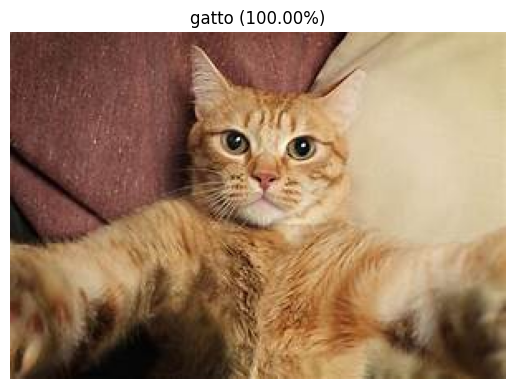

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 46ms/step
Prediction: gatto (100.00%)


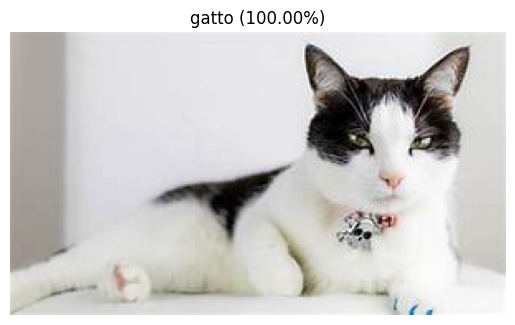

In [ ]:
def predict_image(img_path):
    img = cv2.imread(img_path)
    img = cv2.resize(img, (224, 224))
    img = np.expand_dims(img, axis=0)
    img = preprocess_input(img)

    pred = model.predict(img)
    predicted_class = classes[np.argmax(pred)]
    confidence = np.max(pred)

    print(f"Prediction: {predicted_class} ({confidence * 100:.2f}%)")

    # Show image
    plt.imshow(cv2.cvtColor(cv2.imread(img_path), cv2.COLOR_BGR2RGB))
    plt.title(f"{predicted_class} ({confidence*100:.2f}%)")
    plt.axis('off')
    plt.show()

# Example usage:
predict_image("animals_dataset/raw-img/gatto/1.jpeg")
predict_image("animals_dataset/raw-img/gatto/7.jpeg")


In [ ]:
import os

print(os.listdir("animals_dataset/raw-img/elefante"))

['ea35b20a2bf7023ed1584d05fb1d4e9fe777ead218ac104497f5c978a4efb4bb_640.jpg', 'ea34b00620f2043ed1584d05fb1d4e9fe777ead218ac104497f5c978a4efbcb0_640.jpg', 'OIP-JT3i2AAQRKSl5eb6DVH1bAHaFj.jpeg', 'ea36b30a2bf5033ed1584d05fb1d4e9fe777ead218ac104497f5c978a4efb4bb_640.jpg', 'OIP-jXQdhdeqYIVqONxHpnplDQHaE7.jpeg', 'ea37b90c2efc083ed1584d05fb1d4e9fe777ead218ac104497f5c978a4efbcb0_640.jpg', 'OIP-rIFDPc8myXNX7MXGRKwTJAHaG4.jpeg', 'OIP-7egGpU_yZb_zVMy8pueiiwHaEo.jpeg', 'eb30b40d2cf1013ed1584d05fb1d4e9fe777ead218ac104497f5c978a4eebdbd_640.jpg', 'OIP-rqV6wKqCLZ6eKo-dZsNcowHaEo.jpeg', 'OIP-jJDO330zT2MtAmfrbSecRgHaFj.jpeg', 'ea35b90b29fd073ed1584d05fb1d4e9fe777ead218ac104497f5c978a4efb4bb_640.jpg', 'eb32b80e21f2053ed1584d05fb1d4e9fe777ead218ac104497f5c978a4efbcb0_640.jpg', 'OIP-TMDDDptNJbFk2u6tkNO1FQHaE6.jpeg', 'OIP-WJxXXybWuStdW83awVhMoAHaFj.jpeg', 'OIP-R5LdhT21tH0sFZva8qLIZAHaFj.jpeg', 'eb33b2082bf6003ed1584d05fb1d4e9fe777ead218ac104497f5c978a4efbcb0_640.jpg', 'ed34b80929f71c22d2524518b7444f92e37fe5d

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 69ms/step
Prediction: cane (100.00%)


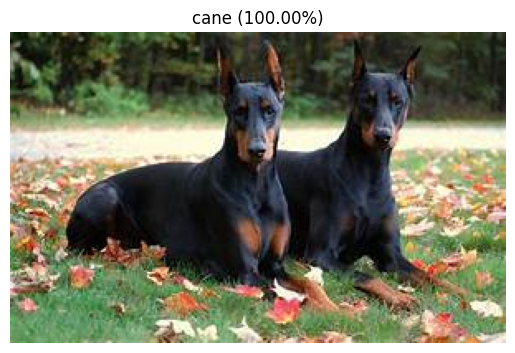

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 59ms/step
Prediction: cavallo (100.00%)


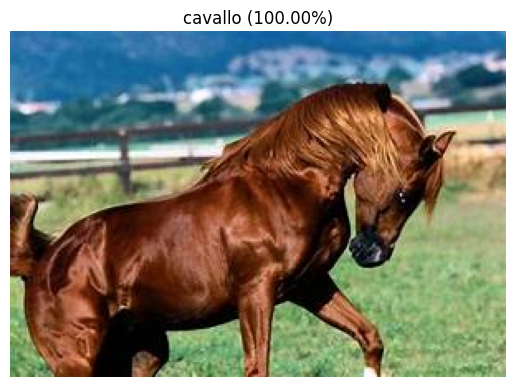

In [ ]:
def predict_image(img_path):
    img = cv2.imread(img_path)
    img = cv2.resize(img, (224, 224))
    img = np.expand_dims(img, axis=0)
    img = preprocess_input(img)

    pred = model.predict(img)
    predicted_class = classes[np.argmax(pred)]
    confidence = np.max(pred)

    print(f"Prediction: {predicted_class} ({confidence * 100:.2f}%)")

    # Show image
    plt.imshow(cv2.cvtColor(cv2.imread(img_path), cv2.COLOR_BGR2RGB))
    plt.title(f"{predicted_class} ({confidence*100:.2f}%)")
    plt.axis('off')
    plt.show()

# Example usage:
predict_image("animals_dataset/raw-img/cane/OIP-5mOEUoZ4dvPFyOTO52GvLwHaEo.jpeg")
predict_image("animals_dataset/raw-img/cavallo/OIP-3_DoKp1G1B3wxXf0vPq27AHaFJ.jpeg")
